In [1]:
!pip install pandas scikit-learn matplotlib seaborn -q

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load the Dataset
file_path = r"C:\Users\Harpitha\Downloads\Machinehack\Train.csv"
data = pd.read_csv(file_path)

C:\Users\Harpitha\AppData\Local\Temp\ipykernel_1060\2718229467.py:3: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [4]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
  Unnamed: 0                                               text genre label  \
0          0  It starts with pain, followed by hate\nFueled ...  rock     9   
1          1  Freedom!\nAlone again again alone\nPatiently w...  rock     9   
2          2  Biting the hand that feeds you, lying to the v...  rock     9   
3          3  You say you know just who I am\nBut you can't ...  rock     9   
4          4  My heart is beating faster can't control these...  rock     9   

  label_model                                       text_cleaned  
0     LABEL_9  It starts with pain, followed by hate\nFueled ...  
1     LABEL_9  Freedom!\nAlone again again alone\nPatiently w...  
2     LABEL_9  Biting the hand that feeds you, lying to the v...  
3     LABEL_9  You say you know just who I am\nBut you can't ...  
4     LABEL_9  My heart is beating faster can't control these...  


In [5]:
# Step 3: Data Preprocessing
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0        74
text            1886
genre           1864
label           1866
label_model     1866
text_cleaned    1909
dtype: int64


In [6]:
# Drop rows with missing values (if any)
data = data.dropna()
# Drop rows with missing values (if any)
data = data.dropna()
# Separate features (X) and target (y)
X = data.drop(columns=['label_model'])
y = data['label_model']
# Encode categorical variables (if any)
# Automatically detect object or string columns and encode them
for column in X.select_dtypes(include=['object']).columns:
    X[column] = X[column].astype(str)  # Ensure all text data is string
    X[column] = X[column].factorize()[0]  # Convert to numeric

# Encode the target column if it's categorical
if y.dtype == 'object':
    y = y.astype(str).factorize()[0]

print("\nPreprocessed Data Sample:")
print(X.head())


Preprocessed Data Sample:
   Unnamed: 0  text  genre  label  text_cleaned
0           0     0      0      0             0
1           1     1      0      0             1
2           2     2      0      0             2
3           3     3      0      0             3
4           4     4      0      0             4


In [7]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Step 5: Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Step 6: Model Evaluation
y_pred = model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24362
           1       1.00      1.00      1.00      4025
           2       1.00      1.00      1.00     21616
           3       1.00      1.00      1.00      1658
           4       1.00      1.00      1.00       565
           5       1.00      1.00      1.00      1796
           7       1.00      1.00      1.00       431
           8       1.00      1.00      1.00      2729
           9       1.00      1.00      1.00       458
          10       1.00      1.00      1.00       389

    accuracy                           1.00     58029
   macro avg       1.00      1.00      1.00     58029
weighted avg       1.00      1.00      1.00     58029


Accuracy: 1.00


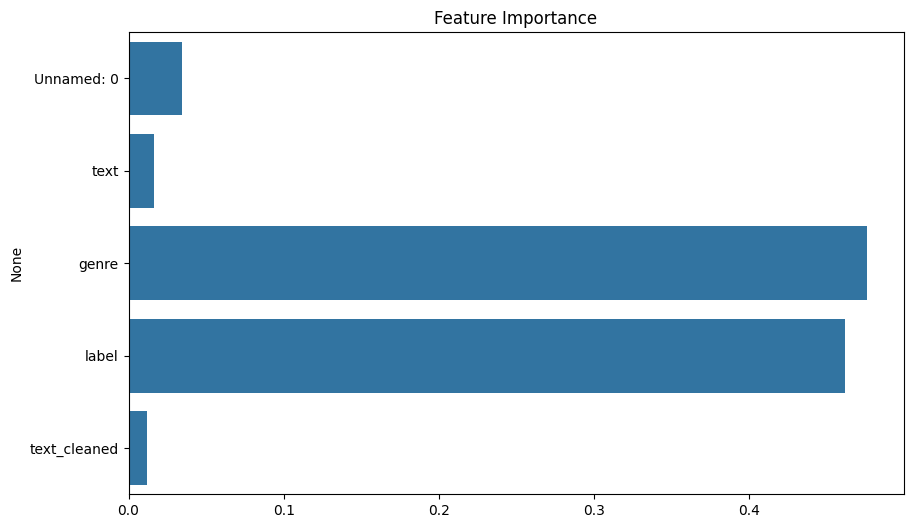

In [10]:

# Step 7: Feature Importance Visualization
feature_importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.show()


In [11]:
# Step 8: Save the Model (Optional)
import joblib
joblib.dump(model, 'trained_model.pkl')
print("\nModel saved as 'trained_model.pkl'.")


Model saved as 'trained_model.pkl'.


In [12]:
# Step 9: Inference Example
# Replace this with your inference data
sample_data = X_test.iloc[:1]  # Take one row from the test set
predicted_label = model.predict(sample_data)
print("\nSample Prediction:")
print(f"Predicted Label: {predicted_label[0]}")


Sample Prediction:
Predicted Label: 2


In [13]:
# Check model details
print(model)

RandomForestClassifier(random_state=42)
